# 표준화된 기능을 사용하는 모델 설명하기

특징 표준화는 많은 ML 파이프라인의 일반적인 전처리 단계입니다. 표준화된 특징을 사용하는 모델을 설명할 때는 표준화된 버전이 아닌 원래 입력 특징을 사용하여 설명하는 것이 바람직할 때가 많습니다. 이 노트북에서는 모델의 입력에 적용된 단변량 변환이 모델의 샤플리 값에 영향을 주지 않는다는 속성을 사용하여 이를 수행하는 방법을 보여줍니다(PCA 분해와 같은 다변량 변환은 샤플리 값을 변경하므로 이 트릭이 적용되지 않음).

## 표준화된 기능을 사용하는 선형 모델 구축

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datase

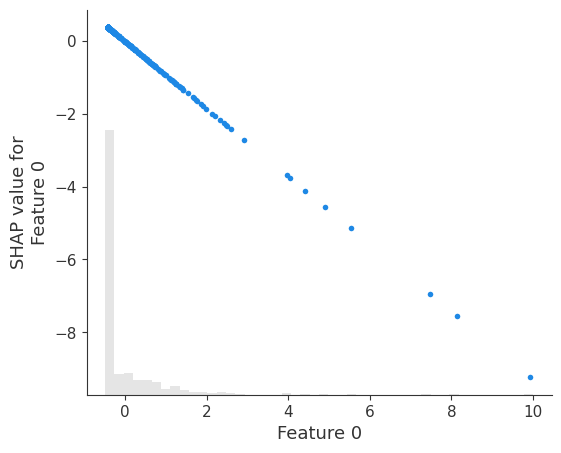

In [3]:
import sklearn
import shap

# 표준화된 데이터 얻기
X, y = shap.datasets.boston()
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

# 선형 모델 훈련
model = sklearn.linear_model.LinearRegression().fit(X_std, y)

# SHAP을 사용하여 모델의 예측을 설명합니다.
explainer = shap.explainers.Linear(model, X_std)
shap_values = explainer(X_std)

# 첫 번째 특징에 대한 모델의 종속성을 시각화합니다.
shap.plots.scatter(shap_values[:, 0])

## 설명을 원래 특징 공간으로 변환

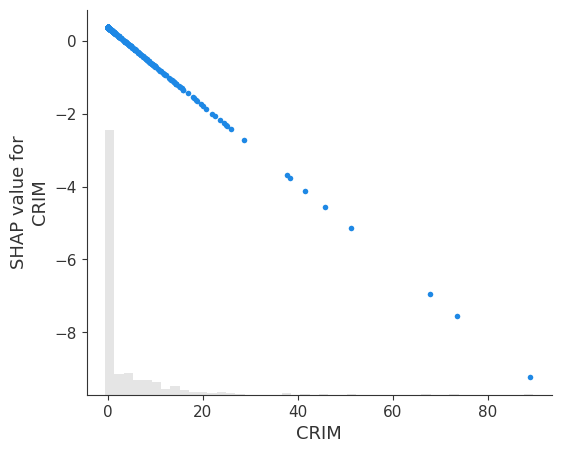

In [4]:
# StandardScaler 에 의해 제거된 특징 이름을 다시 추가합니다.
for i,c in enumerate(X.columns):
    shap_values.feature_names[i] = c

# 원본 데이터로 다시 변환합니다.
# (X_std는 X의 단변량 변환 집합이므로 이렇게 할 수 있습니다).
shap_values.data = X.values

# 이제 새로운 원래 특징 공간에서 첫 번째 특징에 대한 모델의 종속성을 다시 시각화합니다.
shap.plots.scatter(shap_values[:, 0])

<hr>
Have an idea for more helpful examples? Pull requests that add to this documentation notebook are encouraged! 